# Lab | Basic Data Cleaning and EDA
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in the files_for_lab folder.

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

**Some business Objectives for the case study could be:**

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions
1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))
3. First, look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.
6. Plot a correlation matrix, and comment on what you observe.
7. Plot every continuous variable. Comment what you can see in the plots.
8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

### 1. Import the necessary libraries.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [80]:
customer_df  = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/machine-learning/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First, look at its main features (head, shape, info).

In [81]:
customer_df .head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [82]:
customer_df.shape

(9134, 24)

In [83]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [84]:
customer_df.columns = [column.lower().replace(' ', '_') for column in df.columns]

### 5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

Looks like no featues need to be converted with different dtypes.

### 6. Plot a correlation matrix, and comment on what you observe.

In [85]:
df_numerical = customer_df.select_dtypes(include=['float64','int64'])


In [86]:
df_numerical_corr = df_numerical.corr()
df_numerical_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [87]:
df_numerical_corr["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

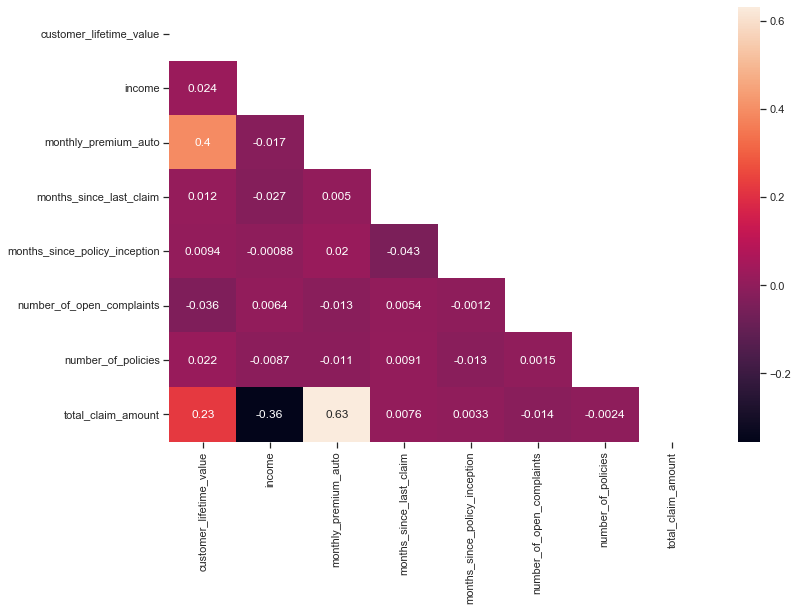

In [88]:
mask = np.zeros_like(df_numerical_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_numerical_corr, mask=mask, annot=True, ax=ax)
plt.show()

The correlation matrix reveals the following insights:

- Customer Lifetime Value (CLV) has a moderate positive correlation with Monthly Premium Auto (0.396), indicating that customers with higher CLV tend to have higher monthly premiums.

- Monthly Premium Auto also has a strong positive correlation with Total Claim Amount (0.632), suggesting that customers with higher monthly premiums are likely to file larger insurance claims.

- Income has a weak positive correlation with Customer Lifetime Value (0.024), implying that higher-income customers may have slightly higher CLV.

- Income has a negative correlation with Total Claim Amount (-0.355), indicating that customers with higher incomes tend to file smaller insurance claims.

- There is no significant correlation between Income and Monthly Premium Auto (-0.017), suggesting that income may not strongly influence the monthly premium amount.

- The variables Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, and Number of Policies have weak correlations with other variables in the dataset, indicating a lack of strong relationships.

In summary, the correlation matrix reveals that the most notable relationships exist between Monthly Premium Auto and both Customer Lifetime Value and Total Claim Amount. Additionally, Income shows a weak association with Customer Lifetime Value and a negative relationship with Total Claim Amount. The remaining variables appear to have minimal or negligible correlations with each other.

### 7. Plot every continuous variable. Comment what you can see in the plots.

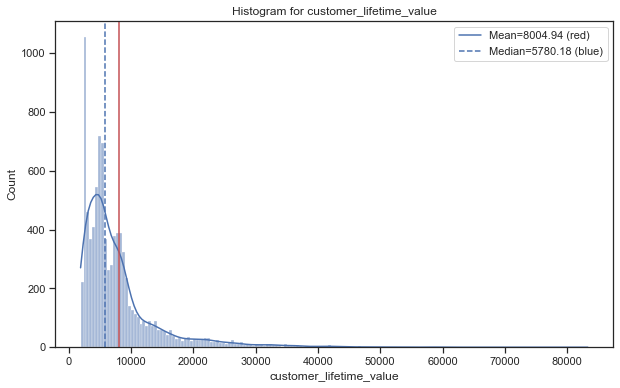

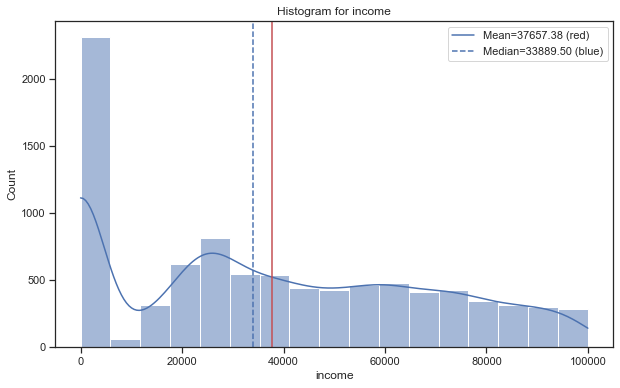

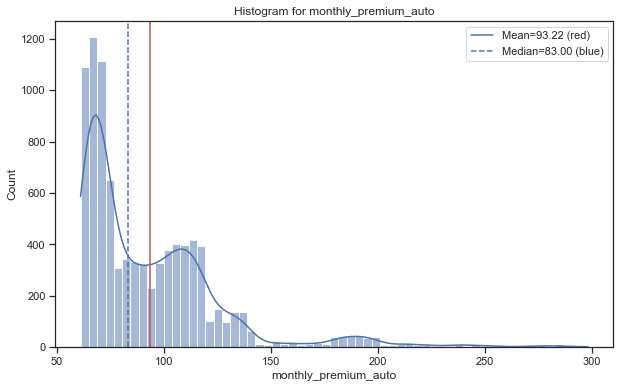

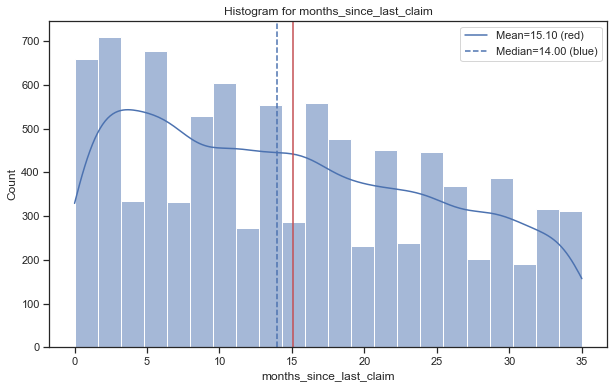

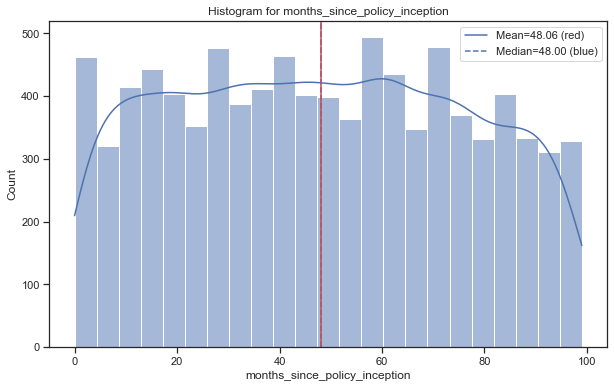

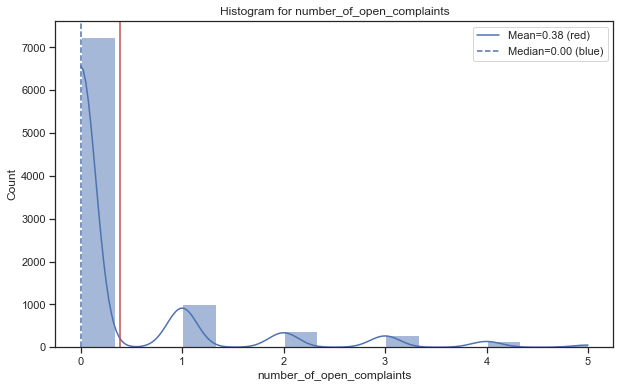

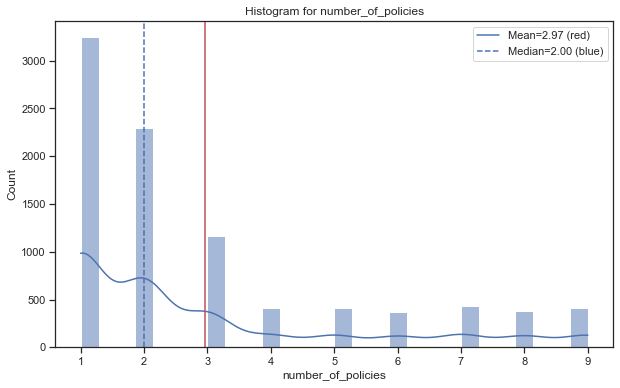

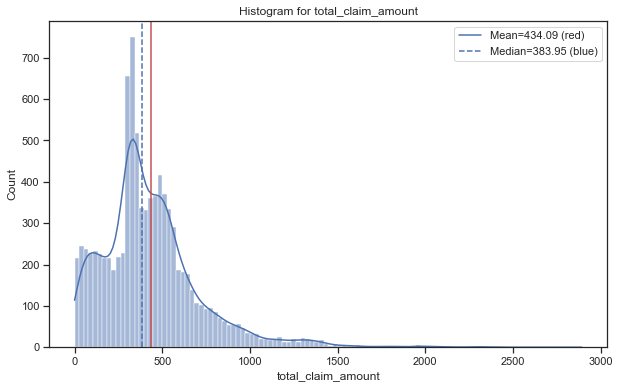

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


for col in df_numerical.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_numerical[col], kde=True)
    mean_value = df_numerical[col].mean()
    median_value = df_numerical[col].median()
    plt.axvline(median_value, color='b', linestyle='--')
    plt.axvline(mean_value, color='r', linestyle='-')
    plt.legend({f'Mean={mean_value:.2f} (red)':mean_value, f'Median={median_value:.2f} (blue)':median_value})
    plt.title(f'Histogram for {col}')

    plt.show()


- **Customer Lifetime Value**:

The histogram shows a right-skewed distribution, indicating that most customers have a lower lifetime value, while a smaller number of customers have a higher lifetime value.


- **Income**:

The histogram shows a somewhat symmetrical distribution with a peak around $30,000. However, there is a tail towards higher incomes.


- **Monthly Premium Auto**:

The histogram shows a relatively symmetrical distribution with a peak around $70. There are no clear indications of significant skewness.


- **Months Since Last Claim**:

The histogram shows a relatively even distribution across the different bin ranges, indicating a fairly symmetrical distribution.


- **Months Since Policy Inception**:

The histogram shows a relatively even distribution across the different bin ranges, indicating a fairly symmetrical distribution.


- **Number of Open Complaints**:

The histogram shows a highly skewed distribution, with the majority of customers having no open complaints and a small number of customers having a few open complaints.


- **Number of Policies**:

The histogram shows a relatively symmetrical distribution, with a peak around 1 and a gradually decreasing frequency as the number of policies increases.


- **Total Claim Amount**:

The histogram shows a slightly right-skewed distribution, with a concentration of lower claim amounts and a tail towards higher claim amounts.


### 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [90]:
df_categorical = customer_df.select_dtypes(include=['object'])

In [91]:
# Remove Customer(Id) and effective_to_date (just temporariliy)
df_categorical = df_categorical.drop(['customer', 'effective_to_date'], axis=1)

Removing customer IDs or unique identifiers from the dataset before training a machine learning model is recommended because:

- They are irrelevant to the target variable and do not provide meaningful information.
- Their uniqueness can mislead the model and hinder generalization to new data.
- Including them may introduce biases and unfair discrimination.

By removing these identifiers, the model can focus on relevant features, avoid overfitting, and make more accurate predictions.

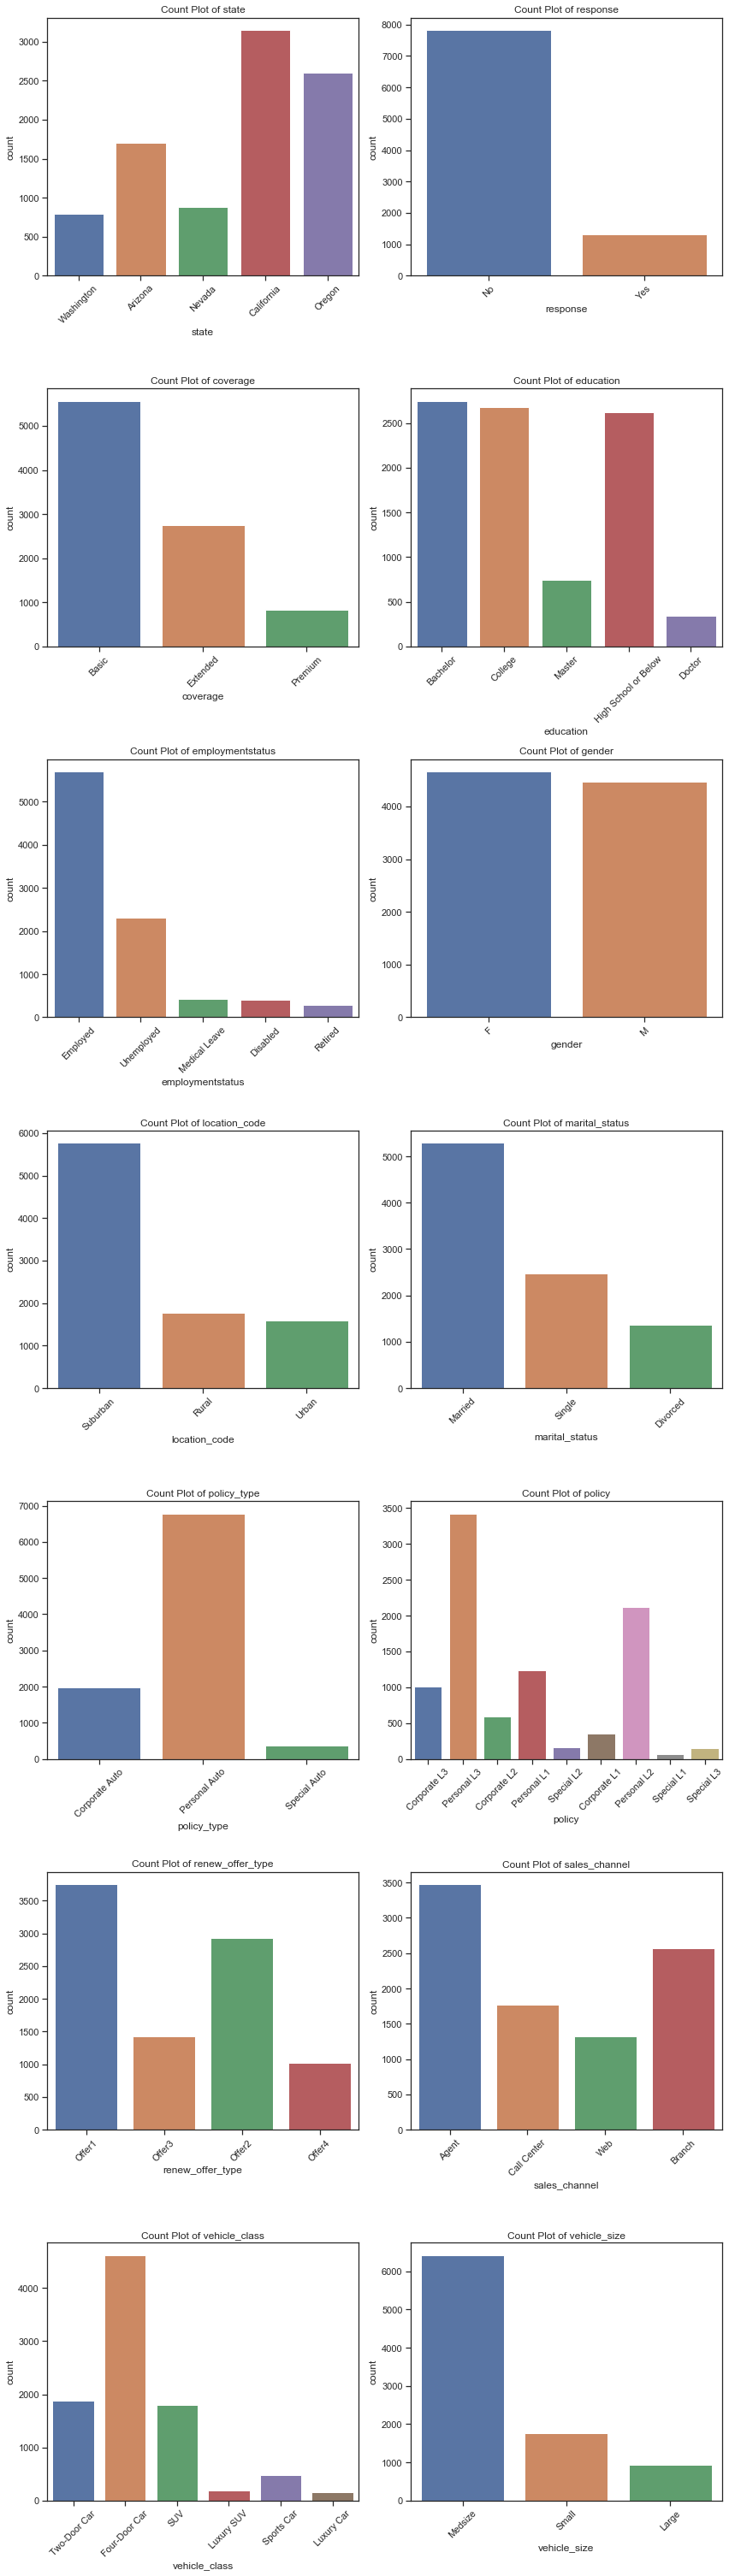

In [92]:
num_cols = len(df_categorical.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, num_rows * 6))

for i, col in enumerate(df_categorical.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=col, data=df_categorical)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [99]:
df_categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


- **State**: The dataset primarily consists of customers from California, Oregon, Arizona, Nevada, and Washington. These states likely represent the geographical focus or target market of the company.

- **Response**: The majority of customers in the dataset have responded with "No." This suggests that the response rate for the company's offerings may be relatively low.

- **Coverage**: The most common coverage level is "Basic," followed by "Extended" and "Premium." This indicates that a significant portion of customers opt for basic coverage, potentially seeking affordable insurance options.

- **Education**: The dataset includes customers with various education levels, with a large number holding a bachelor's or college degree. This suggests that the company's offerings attract customers from different educational backgrounds.

- **Employment Status**: The majority of customers in the dataset are employed, while there is also a notable number of unemployed individuals. This indicates that the company caters to a diverse customer base in terms of employment status.

- **Gender**: The dataset shows a relatively balanced representation of both male and female customers, indicating that the company's offerings appeal to a broad gender demographic.

- **Location Code**: The majority of customers reside in suburban areas, followed by rural and urban locations. This suggests that the company's services are accessible to customers across different types of locations.

- **Marital Status**: The dataset includes both married and single customers, with a smaller portion being divorced. This indicates that the company's offerings attract customers from various marital status backgrounds.

- **Policy Type**: The most common policy type is "Personal Auto," followed by "Corporate Auto" and "Special Auto." This suggests that the majority of customers opt for personal auto insurance policies.

- **Policy**: The dataset comprises a range of policy options, with "Personal L3" being the most common. This indicates that customers often select comprehensive or higher coverage options for their policies.

- **Renew Offer Type**: The majority of customers received "Offer1" for policy renewal, followed by "Offer2" and "Offer3." This suggests that the company employs different offers or incentives to encourage policy renewal.

- **Sales Channel**: The dataset shows that sales primarily occur through agents, followed by branch offices, call centers, and web channels. This indicates a multichannel approach to reach and engage customers.

- **Vehicle Class**: "Four-Door Car" is the most common vehicle class among customers, followed by "Two-Door Car," "SUV," "Sports Car," "Luxury SUV," and "Luxury Car." This provides insights into the types of vehicles that customers typically insure with the company.

- **Vehicle Size**: The majority of vehicles in the dataset are of medium size, followed by small and large vehicles. This indicates that the company's insurance offerings cater to a variety of vehicle sizes.

### 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

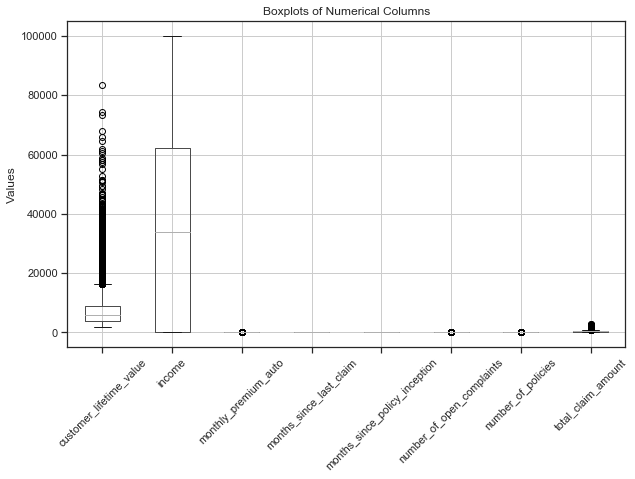

In [104]:

df_numerical.boxplot(figsize=(10, 6))
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()

In [105]:
outliers_dict = {}
for col in df_numerical.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_numerical[col].quantile(0.25)
    Q3 = df_numerical[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = df_numerical[(df_numerical[col] < (Q1 - 1.5 * IQR)) | (df_numerical[col] > (Q3 + 1.5 * IQR))][col]


    n_outliers = len(outliers)
    percentage = (n_outliers / len(df_numerical)) * 100


    outliers_dict[col] = {'count': n_outliers, 'percentage': percentage}

# Print the number and percentage of outliers for each column
for col, outlier_info in outliers_dict.items():
    print(f'{col}: {outlier_info["count"]} outliers ({outlier_info["percentage"]:.2f}%)')

customer_lifetime_value: 817 outliers (8.94%)
income: 0 outliers (0.00%)
monthly_premium_auto: 430 outliers (4.71%)
months_since_last_claim: 0 outliers (0.00%)
months_since_policy_inception: 0 outliers (0.00%)
number_of_open_complaints: 1882 outliers (20.60%)
number_of_policies: 416 outliers (4.55%)
total_claim_amount: 453 outliers (4.96%)


Outliers are most likely to be removed if necessary after investigation of its importance for the analysis. Since our target varaible is total_claim_amount which has a quite big number of outerliers, treating outliers of this variable is particularly important. 

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

No NaN values identifed from the dataset

In [107]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64